<a href="https://colab.research.google.com/github/VIDHYADHARAN-N-M/OIBSIP/blob/main/OASIS_DATASCIENCE_TASK5_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SALES PREDICTION USING PYTHON**

**NAME - VIDHYADHARAN N M**

**BATCH - November-P2**

**INTERNSHIP@OASIS-DATASCIENCE**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#Reading csv file
df=pd.read_csv("/content/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


#EDA

In [55]:
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [56]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [57]:
df=df.drop(columns="Unnamed: 0", axis=1)

In [58]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [155]:
df.tail(5)

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [60]:
#dataset description
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [61]:
#shape
df.shape

(200, 4)

In [62]:
#checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There is no null values present in this dataset

In [63]:
#checking for duplicate values
df.duplicated().sum()

0

In [64]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#Data visualization

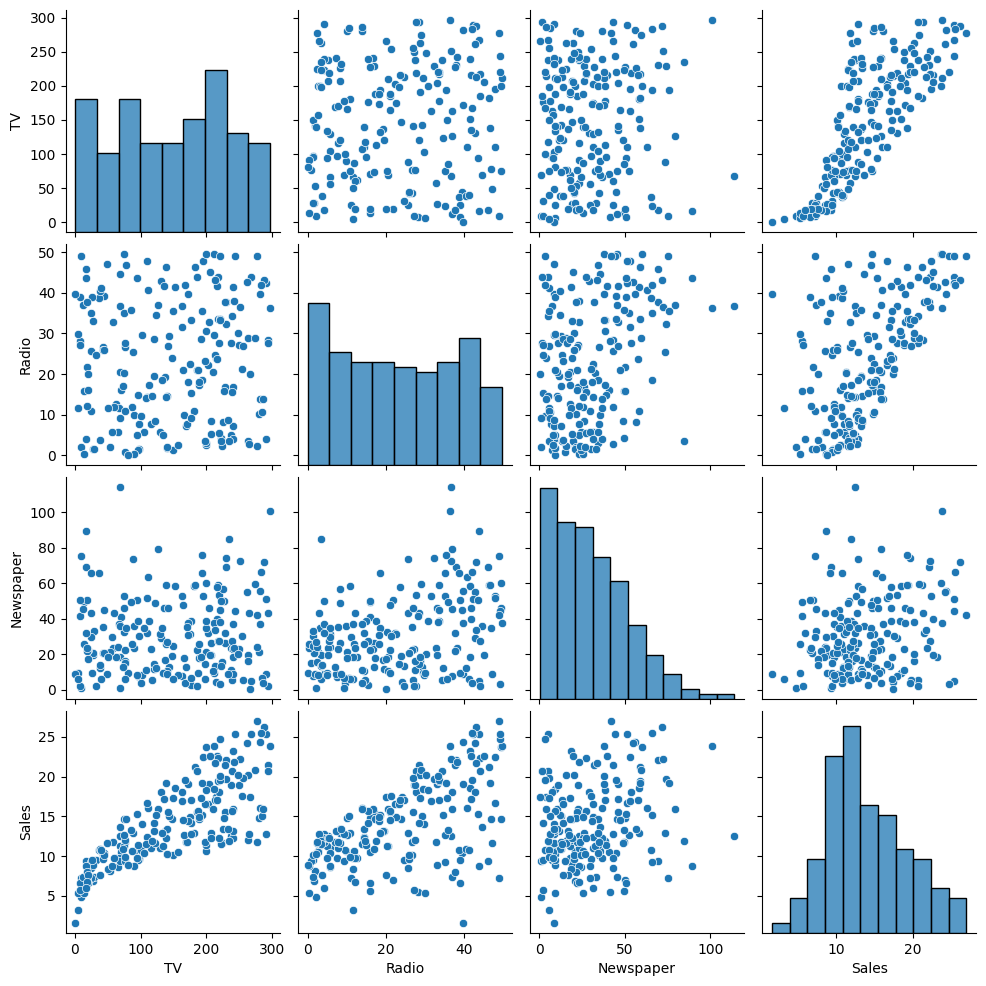

In [65]:
# To visualize relationships between feature
sns.pairplot(df)

<Axes: xlabel='Sales', ylabel='Count'>

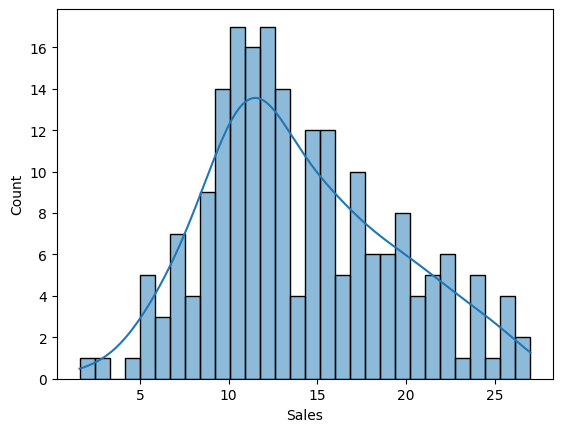

In [66]:
sns.histplot(df['Sales'],bins=30, kde=True)

In [67]:
#Correlation
corr=df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


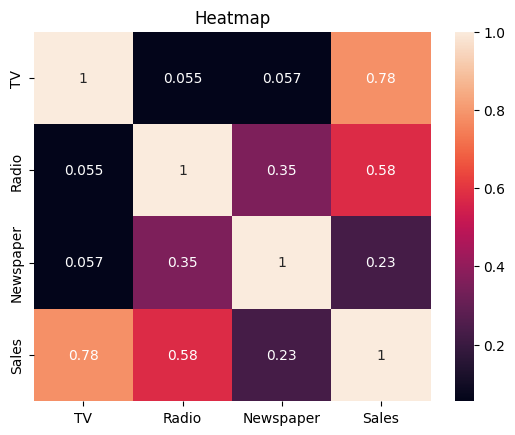

In [68]:
plt.figure()
sns.heatmap(corr, annot=True)
plt.title("Heatmap")
plt.show()

****There is high relation between Sales and TV****

Based on this reation further visualization are done

In [69]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

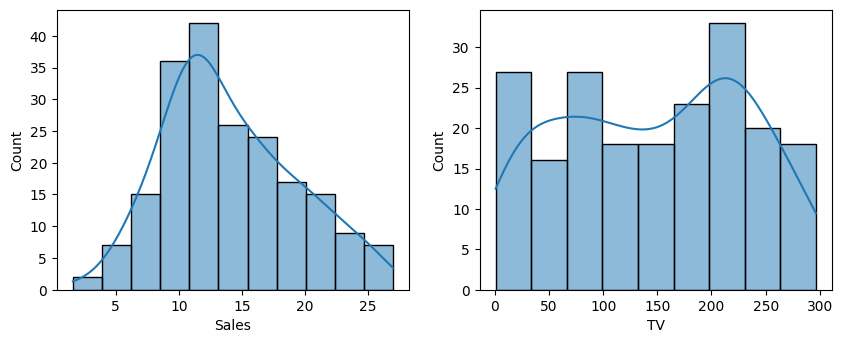

In [70]:
plt.figure(figsize = (10,8))

for i,z in enumerate(['Sales', 'TV']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = z,kde = True)
plt.show()

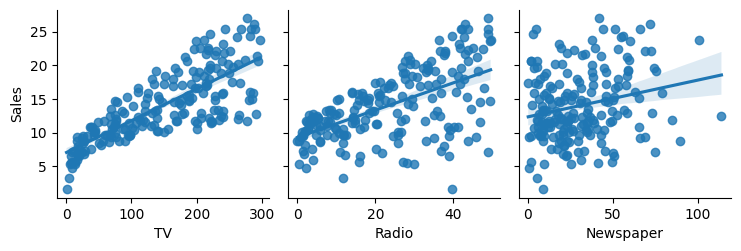

In [71]:
#Pairplot

sns.pairplot(data = df,x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")
plt.show()

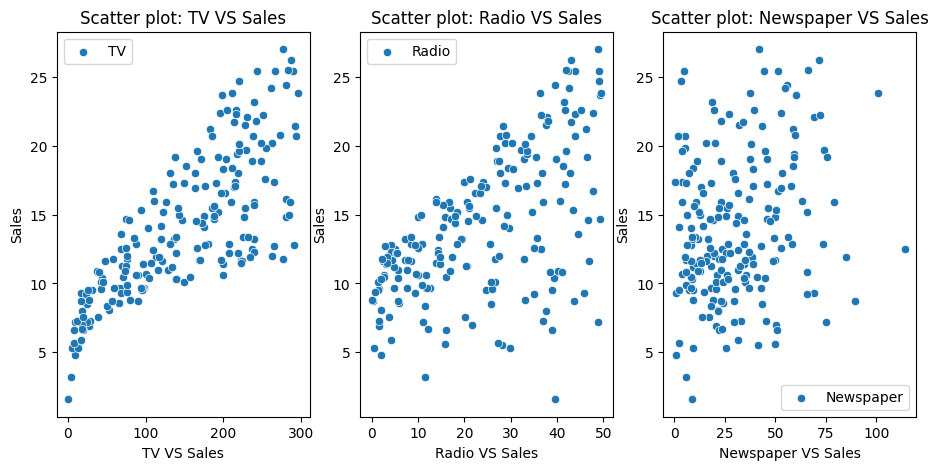

In [72]:
plt.figure(figsize=(15, 5))

col = {
        0: "TV",
        1: "Radio",
        2: "Newspaper"
           }

for i, col_name in col.items():
    plt.subplot(1, 4, i + 1)
    sns.scatterplot(x=df[col_name],y=df["Sales"], label= col_name,)
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Scatter plot: {} VS Sales".format(col_name))
    plt.legend()

plt.show()

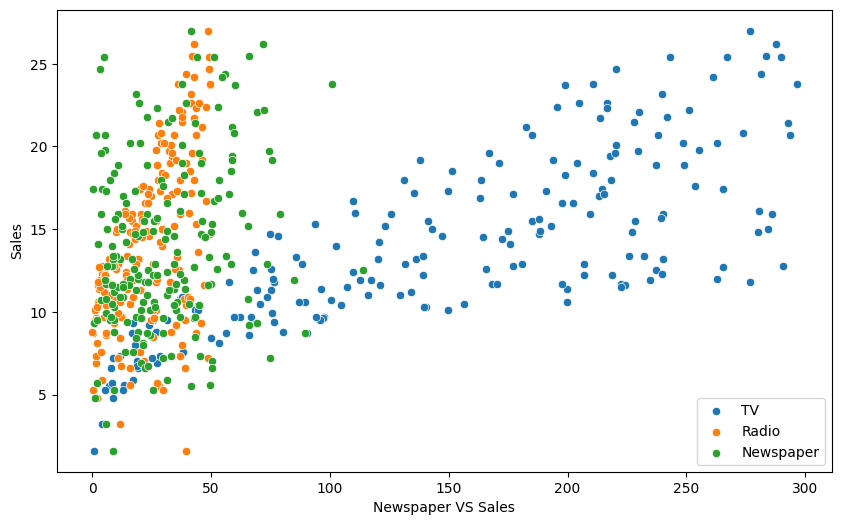

In [73]:
plt.figure(figsize=(10,6))
col = {
        0: "TV",
        1: "Radio",
        2: "Newspaper"
           }

for i, col_name in col.items():
    sns.scatterplot(x=df[col_name],y=df["Sales"], label= col_name,)
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("")
    plt.legend()

plt.show()

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

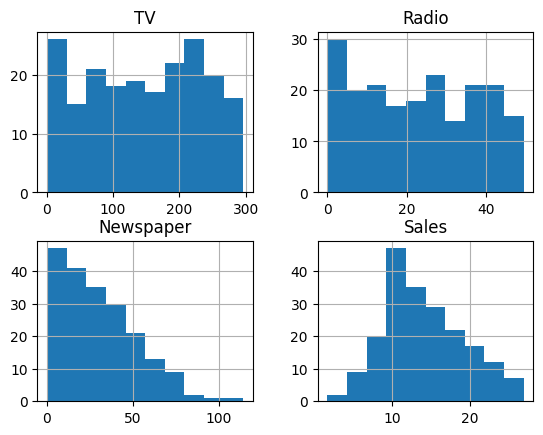

In [74]:
#Histplot
his=df.hist()
his

# Data Spliting

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error

In [114]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [77]:
X=df.drop(columns="Sales")
Y=df['Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=36)

In [89]:
X_train=X_train.astype(int)
X_test=X_test.astype(int)
Y_train=Y_train.astype(int)
Y_test=Y_test.astype(int)

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building - Linear Regression

In [132]:
linear_model = LinearRegression()

linear_model.fit(X_train_scaled, Y_train)

y_pred_lin = linear_model.predict(X_test_scaled)

# Evaluate the model
mse_lin = mean_squared_error(Y_test, y_pred_lin)
mae_lin = mean_absolute_error(Y_test, y_pred_lin)
r2_lin = r2_score(Y_test, y_pred_lin)

print("LINEAR_REGRESSION")
print()
print(f'Mean Squared Error: {mse_lin}')
print(f'Mean Absolute Error: {mae_lin}')
print(f'R-squared: {r2_lin}')

LINEAR_REGRESSION

Mean Squared Error: 2.2497187078475678
Mean Absolute Error: 1.2419795533102866
R-squared: 0.9239172722505102


In [150]:
ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train_scaled, Y_train)

y_pred_rig = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse_rig = mean_squared_error(Y_test, y_pred_rig)
mae_rig = mean_absolute_error(Y_test, y_pred_rig)
r2_rig = r2_score(Y_test, y_pred_rig)
print("Ridge Regressor")
print()
print(f'Mean Squared Error: {mse_rig}')
print(f'Mean Absolute Error: {mae_rig}')
print(f'R-squared: {r2_rig}')

Ridge Regressor

Mean Squared Error: 2.256602004651415
Mean Absolute Error: 1.2457346759476233
R-squared: 0.9236844875939578


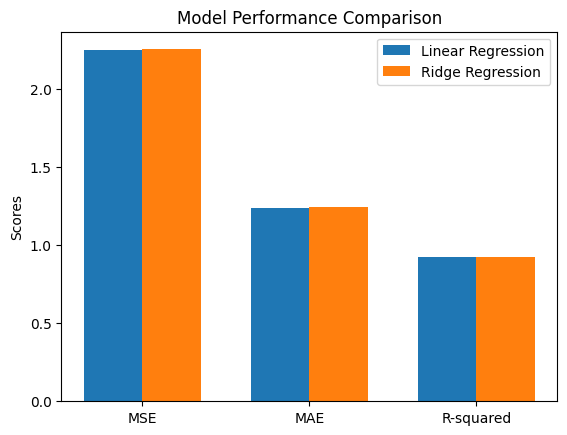

In [154]:

labels = ['MSE', 'MAE', 'R-squared']
linear_scores = [mse_lin, mae_lin, r2_lin]
ridge_scores = [mse_rig, mae_rig, r2_rig]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, linear_scores, width, label='Linear Regression')
rects2 = ax.bar(x + width/2, ridge_scores, width, label='Ridge Regression')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

#Report

Both the regression model has lower value of MSE ,MAE , R-Square value that implies higher in accuracy of a model



